In [8]:
import face_recognition
from imutils.video import VideoStream
import pyttsx3
from collections import defaultdict
from tqdm import tqdm 
import threading
import cv2
import dlib

In [4]:
# 얼굴 감지기와 눈 감지기 초기화
# thread = threading.Thread(target=music)
face_detector = dlib.get_frontal_face_detector()
eye_detector = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

# 눈 감은 상태 확인을 위한 변수 초기화
eye_closed = False
closed_frames = 0
closed_threshold = 30  # 눈을 감은 상태로 판단할 프레임 수
webcam = cv2.VideoCapture(0)

while webcam.isOpened():
    status, frame = webcam.read()
    if not status:
        print('Could not read frame')
        break

    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 감지
    faces = face_detector(gray)

    # 얼굴 영역에서 눈 찾기
    face_texts = []  # 얼굴에 대한 텍스트 리스트 초기화

    for face in faces:
        landmarks = eye_detector(gray, face)
        # 얼굴의 위치 추출
        (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())

        # 눈 감음 여부 확인
        left_eye = landmarks.part(36).y - landmarks.part(37).y
        right_eye = landmarks.part(45).y - landmarks.part(46).y

        if left_eye < 3 and right_eye < 2:  # 눈을 감은 상태로 판단
            closed_frames += 1
            face_texts.append('wake up!!!')  # 각 얼굴에 대한 텍스트 추가
        else:
            closed_frames = 0
            face_texts.append('awake')  # 각 얼굴에 대한 텍스트 추가

    # 얼굴에 대한 텍스트 출력
    for face, text in zip(faces, face_texts):
        (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())
        if text:
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # 화면에 출력
    cv2.imshow('Drowsiness Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 웹캠과 창 닫기
webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [5]:
webcam.release()
cv2.destroyAllWindows()

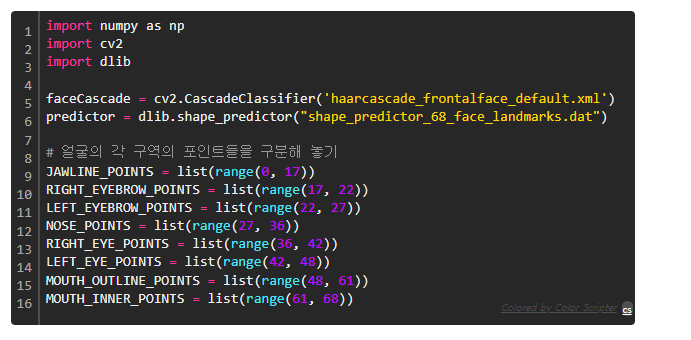

In [ ]:
def speak():
    engine = pyttsx3.init()
    engine.say('졸음 쉼터로 가세요')
    engine.runAndWait()

face_detector = dlib.get_frontal_face_detector()
eye_detector = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

eye_closed = False

webcam = cv2.VideoCapture(0)

while webcam.isOpened():
    status, frame = webcam.read()
    if not status:
        print('Could not read frame')
        break

    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 감지
    faces = face_detector(gray)

    # 얼굴 영역에서 눈 찾기
    face_texts = [] 

    for face in faces:
        landmarks = eye_detector(gray, face)
        # 얼굴의 위치 추출
        (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())

        # 눈 감음 여부 확인
        left_eye = landmarks.part(36).y - landmarks.part(37).y
        right_eye = landmarks.part(45).y - landmarks.part(46).y

        if left_eye < 3 :  # 눈을 감은 상태로 판단
            # closed_frames += 1
            face_texts.append('sleep')  # 각 얼굴에 대한 텍스트 추가
        else:
            # closed_frames = 0
            face_texts.append('awake')  # 각 얼굴에 대한 텍스트 추가

    # 얼굴에 대한 텍스트 출력
    for face, text in zip(faces, face_texts):
        (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())
        if text:
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # 화면에 출력
    cv2.imshow('Drowsiness Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 웹캠과 창 닫기
webcam.release()
cv2.destroyAllWindows()

In [9]:
# 사운드로 변환
def speak():
    engine = pyttsx3.init()
    engine.say('좋조졸음 쉼터로 가세요 ')
    engine.runAndWait()

def main():
    # key = input('자동차 시동을 거시겠습니까?')
    input_key = True
    while input_key:
        key = input('자동차 시동을 거시겠습니까?')
        if key:
            face_detector = dlib.get_frontal_face_detector()
            eye_detector = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
            # 눈 감은 상태 확인을 위한 변수 초기화
            # thread = threading.Thread(target=speak)
            webcam = cv2.VideoCapture(0)
            i = 0 
            while webcam.isOpened():
                status, frame = webcam.read()
                if not status:
                    print('Could not read frame')
                    break

                # 이미지를 그레이스케일로 변환
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                # 얼굴 감지
                faces = face_detector(gray)

                # 얼굴 영역에서 눈 찾기
                text = None  # 얼굴에 대한 텍스트 초기화

                for face in faces:
                    landmarks = eye_detector(gray, face)
                    # 얼굴의 위치 추출
                    (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())

                    # 눈 감음 여부 확인
                    left_eye = landmarks.part(36).y - landmarks.part(37).y
                    # right_eye = landmarks.part(45).y - landmarks.part(46).y
                
                    if left_eye < 3:  # 눈을 감은 상태로 판단
                        text = True
                    else:
                        text = False

                    # 얼굴에 대한 텍스트 출력
                    if text is True:
                        cv2.putText(frame, 'sleep', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                        i += 2
                        if i >= 75:
                            print('졸음 쉼터로 가세요')
                            # 현재위치를 확인하고 졸음쉼터 까지의 경로 추천 or 커피숍 추천
                            thread = threading.Thread(target=speak)  # Create a new thread for each execution
                            thread.start()
                            i = 0
                    elif text is False:
                        cv2.putText(frame, 'awake', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                        if i >= 0:
                            i -= 1
                    else:
                        if i >= 0:
                            i -= 2

                # 화면에 출력
                cv2.imshow('Drowsiness Detection', frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            # 웹캠과 창 닫기
            webcam.release()
            cv2.destroyAllWindows()
            input_key= False
        else:
            print('준비가 되시면 입력해주세요')

if __name__ == "__main__":
    main()

졸음 쉼터로 가세요
졸음 쉼터로 가세요
졸음 쉼터로 가세요
